<a href="https://www.kaggle.com/code/dorsaalh/mobile-price-classification-forward-selection?scriptVersionId=107692652" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Column's descriptions:
**battery_power:** Total energy a battery can store in one time measured in mAh

**blue:** Has bluetooth or not

**clock_speed:** speed at which microprocessor executes instructions

**dual_sim:** Has dual sim support or not

**fc:** Front Camera mega pixels

**four_g:** Has 4G or not

**int_memory:** Internal Memory in Gigabytes

**m_dep:** Mobile Depth in cm

**mobile_wt:** Weight of mobile phone

**n_cores:** Number of cores of processor

**pc:** Primary Camera mega pixels

**px_height:** Pixel Resolution Height

**px_width:** Pixel Resolution Width

**ram:** Random Access Memory in Mega Bytes

**sc_h:** Screen Height of mobile in cm

**sc_w:** Screen Width of mobile in cm

**talk_time:** longest time that a single battery charge will last when you are

**three_g:** Has 3G or not

**touch_screen:** Has touch screen or not

**wifi:** Has wifi or not

**price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [3]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
train.price_range.nunique()

4

In [6]:
train.groupby('price_range').count()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
1,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
2,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
3,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500


In [7]:
#two price classes (low -> 0 & high -> 1)
train.price_range.replace(1, 0, inplace=True)
train.price_range.replace([2, 3], 1, inplace=True)

In [8]:
train.groupby('price_range').count()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
1,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [9]:
x_train, x_test, y_train, y_test = train_test_split(train.drop(columns=['price_range']), train.price_range, test_size=0.2, random_state=0)

In [10]:
from sklearn.metrics import auc

def forward_selection(X, y):
  features = []
  final_features = {'features': [], 'scores': []}
  rem_features = X.columns
  for i in range(len(X.columns)):
    max_score = 0
    best_feature = ""
    best_score = 0
    for feature in rem_features:
      new_X = X[features + [feature]]
      X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)
      logisticRegr = LogisticRegression()
      logisticRegr.fit(X_train, y_train)
      score = logisticRegr.score(X_test, y_test)
      if score > max_score :
        max_score = score
        best_feature = feature
        best_score = score
    rem_features = rem_features.drop(best_feature)
    features.append(best_feature)

    final_features['features'].append(best_feature)
    final_features['scores'].append(best_score)
  final_features['features_rank'] = range(len(X.columns))

  best_index = 0
  mx_feature = 0
  for i in range(len(final_features['scores'])):
    if final_features['scores'][i] > mx_feature:
      mx_feature = final_features['scores'][i] 
      best_index = i

  final_features['best_features'] = final_features['features'][:best_index]
  return final_features

In [11]:
#scaling
standard_scaler = StandardScaler()
x_train[x_train.columns] = standard_scaler.fit_transform(x_train[x_train.columns])

In [12]:
x_test[x_test.columns] = standard_scaler.transform(x_test[x_test.columns])

In [13]:
fs = forward_selection(x_train, y_train)
print(fs)

{'features': ['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed', 'mobile_wt', 'fc', 'four_g', 'dual_sim', 'm_dep', 'n_cores', 'pc', 'int_memory', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'], 'scores': [0.909375, 0.940625, 0.971875, 0.996875, 0.996875, 0.996875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.996875, 0.99375, 0.99375], 'features_rank': range(0, 20), 'best_features': ['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']}


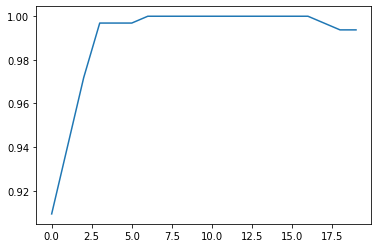

In [14]:
plt.plot(fs['features_rank'], fs['scores'])

In [15]:
print(fs['best_features'])

['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']


In [16]:
logisticReg = LogisticRegression()
logisticReg.fit(x_train[['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']], y_train)
y_pred = logisticReg.predict(x_test[['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']])
print(classification_report(y_pred, logisticReg.predict(x_test[['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       210

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [17]:
pca = PCA(n_components = 6)
pca.fit(x_train)

pca_train = pca.transform(x_train)
pca_test = pca.transform(x_test)

In [18]:
pca_model = LogisticRegression()
pca_model.fit(pca_train, y_train)
print(classification_report(y_test, pca_model.predict(pca_test)))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68       187
           1       0.73      0.69      0.71       213

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.70      0.70      0.70       400



In [19]:
cl = [0, 1, 2, 3]
train['battery_bin'] = pd.cut(train.battery_power, bins = 4, labels = cl)

In [20]:
x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(train.drop(columns=['price_range']),
                                                                    train.price_range, test_size=0.2, random_state=0)

In [21]:
bin_svm = svm.SVC()
bin_svm.fit(x_train_bin.drop(columns='battery_power'), y_train_bin)

SVC()

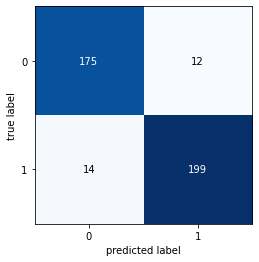

In [22]:
cm = confusion_matrix(y_test_bin, bin_svm.predict(x_test_bin.drop(columns='battery_power')))
fig, ax = plot_confusion_matrix(conf_mat = cm)
plt.show()

In [23]:
pd.cut(x_train_bin.battery_power, bins = 10).value_counts()

(499.503, 650.7]    180
(800.4, 950.1]      175
(650.7, 800.4]      167
(1848.3, 1998.0]    165
(950.1, 1099.8]     158
(1548.9, 1698.6]    157
(1698.6, 1848.3]    153
(1399.2, 1548.9]    151
(1249.5, 1399.2]    148
(1099.8, 1249.5]    146
Name: battery_power, dtype: int64

In [24]:
min(x_train_bin.battery_power)

501

In [25]:
max(x_train_bin.battery_power)

1998

In [26]:
cb = [min(x_train_bin.battery_power), 700, 1000, 1300, 1600, max(x_train_bin.battery_power)]
pd.cut(x_train_bin.battery_power, bins = cb).value_counts()

(1600, 1998]    410
(700, 1000]     345
(1300, 1600]    311
(1000, 1300]    302
(501, 700]      230
Name: battery_power, dtype: int64

<AxesSubplot:>

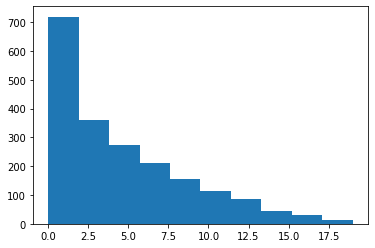

In [27]:
train.fc.hist(grid=False)

<AxesSubplot:>

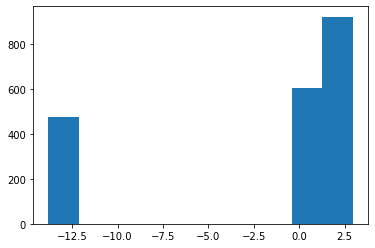

In [28]:
np.log(train.fc+0.000001).hist(grid=False)

In [29]:
train['log_fc'] = np.log(train.fc+0.000001)

In [30]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(train.drop(columns=['price_range', 'battery_bin', 'fc']), 
                                                                    train.price_range, test_size=0.2, random_state=0)

In [31]:
log_svm = svm.SVC()
log_svm.fit(x_train_log, y_train_log)

SVC()

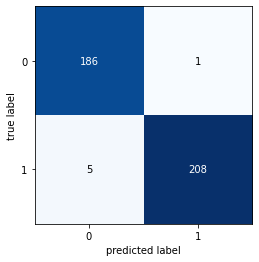

In [32]:
cm = confusion_matrix(y_test_log, log_svm.predict(x_test_log))
fig, ax = plot_confusion_matrix(conf_mat = cm)
plt.show()

In [33]:
train['area'] = train.sc_w * train.sc_h

In [34]:
x_train_area, x_test_area, y_train_area, y_test_area = train_test_split(train.drop(columns=['price_range', 'battery_bin', 'log_fc']), 
                                                                    train.price_range, test_size=0.2, random_state=0)

In [35]:
area_svm = svm.SVC()
area_svm.fit(x_train_area, y_train_area)

SVC()

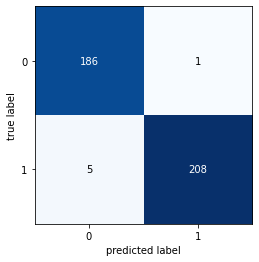

In [36]:
cm = confusion_matrix(y_test_area, area_svm.predict(x_test_area))
fig, ax = plot_confusion_matrix(conf_mat = cm)
plt.show()

In [37]:
categorical_features = []
for feature in train.columns.to_list():
  if ( len(train[feature].unique()) < 3 ):
    categorical_features.append(feature)

categorical_features.remove('price_range')
categorical_features

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [38]:
train = pd.get_dummies(train, columns=categorical_features, prefix=categorical_features)
train.sample(3)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,dual_sim_0,dual_sim_1,four_g_0,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
632,946,2.1,0,19,0.2,154,8,0,159,630,...,1,0,0,1,0,1,0,1,1,0
1546,1776,2.2,2,20,0.9,82,6,16,1563,1803,...,1,0,1,0,1,0,0,1,0,1
907,1800,3.0,5,53,0.3,87,1,12,191,1108,...,1,0,1,0,1,0,1,0,0,1


In [39]:
x_train_one_hot, x_test_one_hot, y_train_one_hot, y_test_one_hot = train_test_split(
    train.drop(columns=['price_range', 'battery_bin', 'log_fc', 'area']), 
    train.price_range, test_size=0.2, random_state=0)

In [40]:
one_hot_svm = svm.SVC()
one_hot_svm.fit(x_train_one_hot, y_train_one_hot)

SVC()

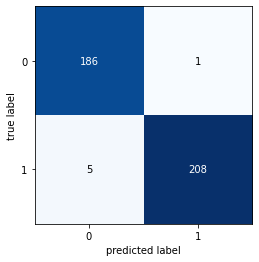

In [41]:
cm = confusion_matrix(y_test_one_hot, one_hot_svm.predict(x_test_one_hot))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [42]:
x_train_mix, x_test_mix, y_train_mix, y_test_mix = train_test_split(
    train.drop(columns=['battery_power', 'fc', 'price_range']), train.price_range, test_size=0.2, random_state=0)

In [43]:
mix_svm = svm.SVC()
mix_svm.fit(x_train_mix, y_train_mix)

SVC()

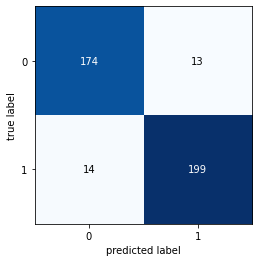

In [44]:
cm = confusion_matrix(y_test_mix, mix_svm.predict(x_test_mix))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [45]:
def backward_selection(X, y):
  features = X.columns
  final_features = {'features': [], 'scores': []}
  rem_features = X.columns
  for i in range(len(X.columns)):
    max_score = 0
    worst_feature = ""
    worst_score = 0
    for feature in rem_features:
      new_X = X[features.drop(feature)]
      X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)
      logisticRegr = LogisticRegression()
      logisticRegr.fit(X_train, y_train)
      score = logisticRegr.score(X_test, y_test)
      if score > max_score :
        max_score = score
        worst_feature = feature
        worst_score = score
    rem_features = rem_features.drop(worst_feature)
    features.drop(worst_feature)

    final_features['features'].append(worst_feature)
    final_features['scores'].append(worst_score)
  final_features['features_rank'] = range(len(X.columns))

  best_index = 0
  mx_feature = 0
  for i in range(len(final_features['scores'])):
    if final_features['scores'][i] > mx_feature:
      mx_feature = final_features['scores'][i] 
      best_index = i

  final_features['best_features'] = final_features['features'][:best_index]

  
  return final_features

In [46]:
bs = backward_selection(x_train, y_train)
print(bs)

{'features': ['int_memory', 'clock_speed', 'fc', 'four_g', 'm_dep', 'talk_time', 'three_g', 'blue', 'dual_sim', 'n_cores', 'pc', 'sc_h', 'sc_w', 'wifi', 'touch_screen', 'mobile_wt', 'px_width', 'px_height', 'battery_power', 'ram'], 'scores': [1.0, 0.996875, 0.996875, 0.996875, 0.996875, 0.996875, 0.996875, 0.99375, 0.99375, 0.99375, 0.99375, 0.99375, 0.99375, 0.99375, 0.990625, 0.984375, 0.98125, 0.975, 0.91875, 0.559375], 'features_rank': range(0, 20), 'best_features': []}


In [47]:
logisticReg = LogisticRegression()
logisticReg.fit(x_train[['int_memory', 'clock_speed', 'fc', 'four_g', 'm_dep', 'talk_time', 'three_g', 'blue', 'dual_sim',
                         'n_cores', 'pc', 'sc_h', 'sc_w', 'wifi', 'touch_screen', 'mobile_wt', 'px_width', 'px_height', 'battery_power', 'ram']], y_train)
y_prd = logisticReg.predict(x_test[['int_memory', 'clock_speed', 'fc', 'four_g', 'm_dep', 'talk_time', 'three_g', 'blue',
                                    'dual_sim', 'n_cores', 'pc', 'sc_h', 'sc_w', 'wifi', 'touch_screen', 'mobile_wt', 'px_width', 'px_height', 'battery_power', 'ram']])

In [48]:
print(classification_report(y_pred, logisticReg.predict(x_test[['int_memory', 'clock_speed', 'fc', 'four_g', 'm_dep', 'talk_time', 'three_g', 'blue',
                                    'dual_sim', 'n_cores', 'pc', 'sc_h', 'sc_w', 'wifi', 'touch_screen', 'mobile_wt', 'px_width', 'px_height', 'battery_power', 'ram']])))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       190
           1       0.97      0.99      0.98       210

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

